# Generate Cosmic Muon Flux

The analytical cosmic ray spectrum is based on [Phys. Atom. Nuclei 69, 1293–1298 (2006)](https://link.springer.com/article/10.1134/S1063778806080047).
The analytical form considers cosmic rays from 1 GeV/c to $10^5$ GeV/c.

Eq (1) in this paper is in unit of /($cm^2\cdot s\cdot sr$).  If integrating p from 1 to 1e5 GeV/c, at $\theta$ =0, we get 0.0076 muons from Eq (1), corresponding to 76 muons/($m^2\cdot s\cdot sr$), which matches the text describing the vertical flux.

Finally ready to generate the cosmic muon flux according to this formula!  Use momentum, $\cos\theta$ (not $\theta$) as the variable

In [1]:
# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import scipy.integrate as integrate

In [2]:
rng = np.random.default_rng()

In [3]:
# Analytical cosmic ray flux from the paper
def dI_dpdcosth(costh, p):
    return 18/(p*costh+145)* (1./np.power(p+2.7/costh, 2.7))* (p+5)/(p+5/costh)

In [4]:
def getNSamples(xmin, xmax, N):
    return rng.uniform(xmin, xmax, N)

In [5]:
def isAccepted(n, vPDF, maxPDF):
    return rng.uniform(0., maxPDF, n) < vPDF

In [6]:
def rejectSampling(pmin, pmax, costhmin, costhmax, nSamples):
    outSamples = np.array([ (p, costh) for p, costh in 
                           zip(getNSamples(pmin, pmax, nSamples), getNSamples(costhmin, costhmax, nSamples)) ])
    outPDF = dI_dpdcosth(outSamples[:,1], outSamples[:,0])
    maxPDF = dI_dpdcosth(costhmax, pmin)

    mask = isAccepted(len(outSamples), outPDF, maxPDF)
    reject, = np.where(~mask)

    while reject.size > 0:
        fill = np.array([ (p, costh) for p, costh in
                        zip(getNSamples(pmin, pmax, reject.size), getNSamples(costhmin, costhmax, reject.size)) ])
        
        fillPDF = dI_dpdcosth(fill[:,1], fill[:,0])
        mask = isAccepted(len(fill), fillPDF, maxPDF)
        outSamples[reject[mask]] = fill[mask]
        reject = reject[~mask]

    return outSamples

In [7]:
nSamples = 10000000
voutSamples = rejectSampling(1., 2., 0.5, 1., nSamples)
len(voutSamples)

10000000

In [8]:
outHist = np.histogram2d(voutSamples[:,0], voutSamples[:,1], bins = [20, 10], range = [[1., 2.], [0.5, 1]])
voutSamples[:,0], outHist

(array([1.5299744 , 1.71907133, 1.05540801, ..., 1.36973848, 1.51755362,
        1.32437494]),
 (array([[ 19769.,  26272.,  33950.,  42735.,  53138.,  65030.,  78376.,
           92707., 108551., 125235.],
         [ 19542.,  25729.,  33314.,  41770.,  52106.,  63210.,  75013.,
           89798., 104309., 120959.],
         [ 19181.,  25489.,  32306.,  41307.,  50407.,  61170.,  74186.,
           87054., 101091., 116882.],
         [ 18511.,  24675.,  31900.,  39890.,  49522.,  59760.,  71710.,
           83880.,  97708., 113022.],
         [ 18389.,  24585.,  31103.,  39138.,  48317.,  58328.,  69155.,
           81700.,  94752., 109387.],
         [ 18182.,  23689.,  30580.,  38111.,  46933.,  56696.,  67160.,
           79345.,  91711., 105372.],
         [ 17830.,  23196.,  29948.,  37418.,  45778.,  54935.,  65277.,
           76524.,  88601., 101979.],
         [ 17256.,  23191.,  29210.,  36477.,  44318.,  53205.,  63062.,
           74651.,  85502.,  99084.],
         [ 17248.

In [9]:
costh, p = np.meshgrid(outHist[2][0:-1], outHist[1][0:-1])
costh

array([[0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.

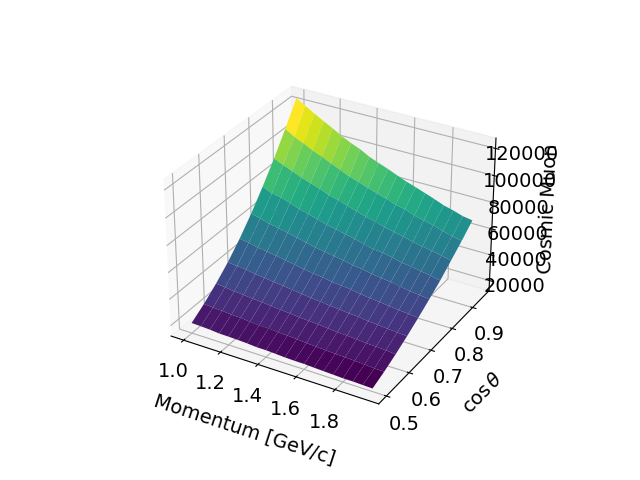

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface( p, costh, outHist[0], cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Cosmic Muon', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

# ax.set_xlim( [1, 2])

## Validation

Compare with the analytic form

In [11]:
# Find the center point of each bin 
cosRefBin = np.arange(0.525, 1.025, 0.05)
pRefBin = np.arange(1.025, 2.025, 0.05)
cosRef, pRef = np.meshgrid(cosRefBin, pRefBin)
# cosRef, pRef
# dI_dpdcosth(cosRef, pRef)
cosRef.size, len(pRef)

(200, 20)

In [12]:
# Normalization
norm = integrate.dblquad(dI_dpdcosth, 1., 2., 0.5, 1.)
f = outHist[0].sum()*1*0.5/norm[0]/(20*10)
f, outHist[0].sum(), norm[0]

(38031439.35972201, 10000000.0, 0.0006573508765612687)

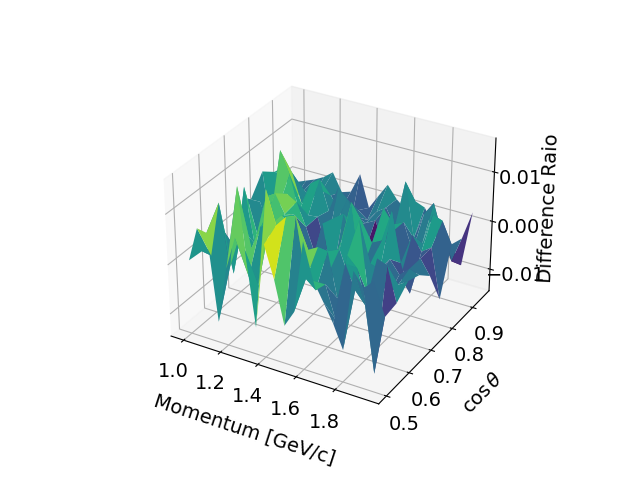

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

formula = dI_dpdcosth(cosRef, pRef)*f
diff = (outHist[0] - formula)/formula
ax.plot_surface( p, costh, diff, cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Difference Raio', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

# ax.set_xlim( [1, 2])
fig.savefig('Residual.png')

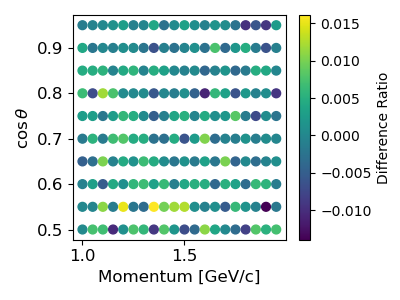

In [15]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )

sc = ax.scatter( p, costh, c = diff, marker = 'o', s = 40, cmap = 'viridis')
fig.colorbar(sc, ax = ax, label = r'Difference Ratio')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 12 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 12 )
# ax.set_zlabel( r'Difference', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

In [18]:
I = integrate.dblquad(dI_dpdcosth, 1., 10., 0., 1.)
I[0]*2*np.pi

0.01349223362627387

## Cosmic Muon Generation over the Entire Phase Space

In [16]:
nSamples = 10000000
pmins = np.array([1., 1., 2., 2., 4., 10.])
pmaxs = np.array([2., 2., 4., 4., 10., 10000.])
costhmins = np.array([0., 0.5, 0., 0.5, 0., 0.])
costhmaxs = np.array([0.5, 1., 0.5, 1., 1., 1.])

In [17]:
voutSamples = np.array([ rejectSampling(pmin, pmax, costhmin, costhmax, nSamples)
                        for pmin, pmax, costhmin, costhmax in zip(pmins, pmaxs, costhmins, costhmaxs) ])

In [18]:
voutSamples

array([[[ 1.69026559,  0.47500469],
        [ 1.62594644,  0.47681492],
        [ 1.63929539,  0.4734408 ],
        ...,
        [ 1.06612328,  0.4722691 ],
        [ 1.18713756,  0.3521335 ],
        [ 1.03874213,  0.39006242]],

       [[ 1.51588875,  0.95801283],
        [ 1.10499829,  0.75575839],
        [ 1.34668466,  0.98004013],
        ...,
        [ 1.84092412,  0.99317683],
        [ 1.48989769,  0.88911281],
        [ 1.52147163,  0.73940209]],

       [[ 3.7217632 ,  0.3280697 ],
        [ 2.52615206,  0.35349171],
        [ 2.16449029,  0.48739541],
        ...,
        [ 2.04966302,  0.2466742 ],
        [ 2.98246626,  0.40492829],
        [ 2.44052026,  0.2858486 ]],

       [[ 2.34267716,  0.90806574],
        [ 2.32119698,  0.96443468],
        [ 3.25231725,  0.99020218],
        ...,
        [ 3.45575654,  0.64171786],
        [ 2.26331502,  0.53475901],
        [ 3.50407677,  0.94685403]],

       [[ 7.14179386,  0.86754031],
        [ 6.50375149,  0.8643134 ],
    

In [19]:
with open('CosmicFlux.npy', 'wb') as f:
    np.save(f, voutSamples)